<a href="https://colab.research.google.com/github/mahmoudhaney/TrafficSignRecognition/blob/main/TrafficSign_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Link Kaggle Dataset**

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrarray22","key":"e4c1f648b359614117006aa0cb0b0a02"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 604M/612M [00:04<00:00, 165MB/s]
100% 612M/612M [00:04<00:00, 153MB/s]


In [ ]:
# Unzip dataset
! unzip gtsrb-german-traffic-sign.zip

# **2. Import Dependencies**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import plot_confusion_matrix

# **3. Preparing & Preprocessing Dataset**

In [ ]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:
# Get the images and their labels 
for i in range(classes):
  # Get images in each sub folder in train folder  
  path = os.path.join(cur_path,'train',str(i))
  images = os.listdir(path)

  # Resize every image & convert it into array
  for a in images:
    image = Image.open(path + '/'+ a)
    image = image.resize((30,30))
    image = np.array(image)
    data.append(image)
    labels.append(i)

In [ ]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# **4. Splitting Dataset**

In [ ]:
# Training data => 80%
# Testing  data => 20%
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
# Converting the labels into one encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **5. Building the Model**

In [ ]:
# Build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 146s 148ms/step - loss: 2.0652 - accuracy: 0.4642 - val_loss: 0.6368 - val_accuracy: 0.8572
Epoch 2/30
981/981 [==============================] - 144s 147ms/step - loss: 0.9026 - accuracy: 0.7278 - val_loss: 0.3679 - val_accuracy: 0.8958
Epoch 3/30
981/981 [==============================] - 144s 147ms/step - loss: 0.6716 - accuracy: 0.7976 - val_loss: 0.2817 - val_accuracy: 0.9171
Epoch 4/30
981/981 [==============================] - 146s 149ms/step - loss: 0.5773 - accuracy: 0.8271 - val_loss: 0.2130 - val_accuracy: 0.9390
Epoch 5/30
981/981 [==============================] - 148s 151ms/step - loss: 0.5188 - accuracy: 0.8438 - val_loss: 0.1557 - val_accuracy: 0.9578
Epoch 6/30
981/981 [==============================] - 144s 147ms/step - loss: 0.5022 - accuracy: 0.8504 - val_loss: 0.1650 - val_accuracy: 0.9538
Epoch 7/30
981/981 [==============================] - 143s 146ms/step - loss: 0.4738 - accuracy: 0.8578 - val_loss: 0.1826 -

In [ ]:
# Save the model
model.save("NN_Model.h5")

# **6. Model Evaluation**

### Model Accuracy

In [ ]:
# Import Accuracy Score
from sklearn.metrics import accuracy_score

# Testing data
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [ ]:
X_test = np.array(data)
predict = model.predict(X_test) 
classes = np.argmax(predict, axis=1)

395/395 [==============================] - 13s 33ms/step


In [ ]:
print("Accuracy Score => ", accuracy_score(labels, classes)*100)

Accuracy Score =>  91.93190815518606


### Accuracy Curve

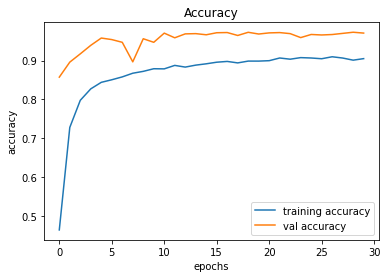

In [ ]:
# For Accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Loss Curve

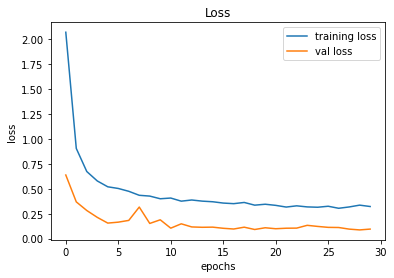

In [ ]:
# For Loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Confusion Matrix

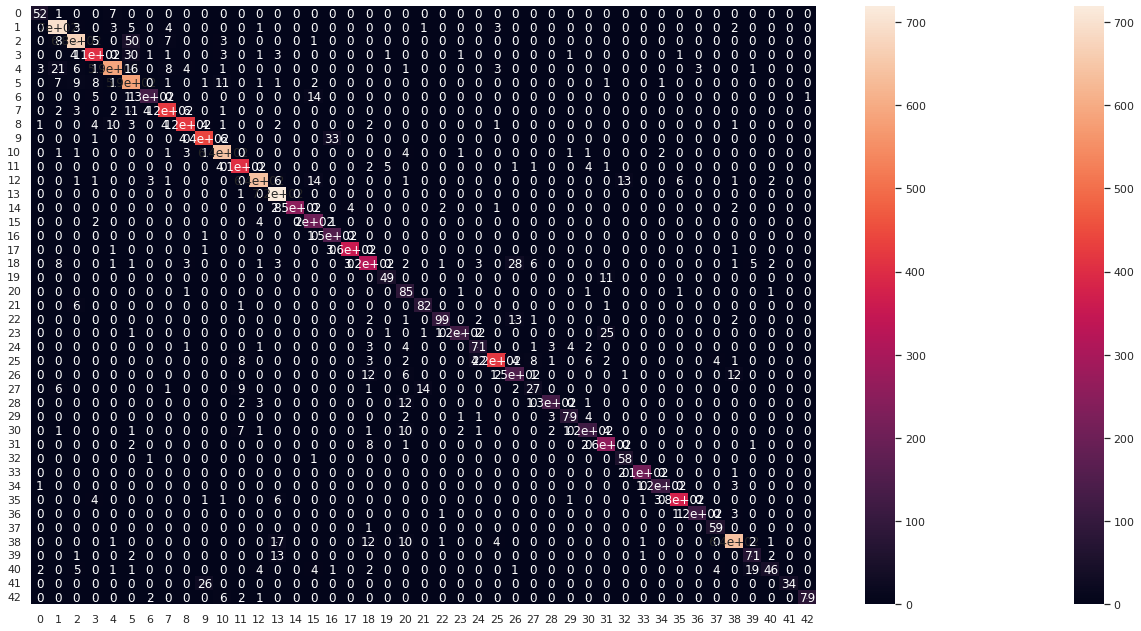

In [ ]:
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(labels, classes)
df_cm = pd.DataFrame(cm, range(43), range(43))
sn.set(font_scale=1.0) # for label size
plt.figure(figsize = (22,11))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 2}) # font size
sn.heatmap(df_cm, annot=True)

### ROC Curve

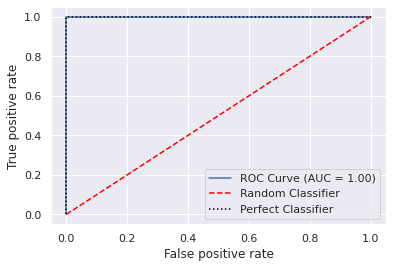

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr_sum = np.zeros(3)
tpr_sum = np.zeros(3)
for class_num in range(43):
  predications = []
  true_labels = []
  for i in range(12630):
    if(np.argmax(predict[i]) == class_num):
      predications.append(1)
    else:
      predications.append(0)
    if(np.argmax(predict[i]) == class_num):
      true_labels.append(1)
    else:
      true_labels.append(0)

  predications = np.array(predications)
  true_labels = np.array(true_labels)
  fpr,tpr,_ = roc_curve(true_labels,predications)
  fpr_sum += fpr
  tpr_sum += tpr

fpr = fpr_sum / predict.shape[1]
tpr = tpr_sum / predict.shape[1]

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier') 
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc

# y_pred = model.predict(X_test)
# roc_curve(labels, y_pred)
# fprate, tprate, thresholds = roc_curve(labels, y_pred, pos_label=1)
"""
It seems the task you are trying to solve is regression: predicting the price. However, you are training a classification model, that assigns a class to every input.

ROC-AUC score is meant for classification problems where the output is the probability of the input belonging to a class. 
If you do a multi-class classification, then you can compute the score for each class independently.

Moreover, the predict method returns a discrete class, not a probability. Let's imagine you do a binary classification and have only one example, 
it should be classified as False. If your classifier yields a probability of 0.7, the ROC-AUC value is 1.0-0.7=0.3. If you use the predict method, 
the ROC-AUC value will be 1.0-1.0=0.0, which won't tell you much.
"""

In [ ]:
import numpy as np
import pandas as pd
from sklearn import model_selection, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
def NeuralClass(X,y):
    X_train,X_test,y_train,y_test = model_selection.train_test_split(
        X,y,test_size=0.2)
    mlp=MLPClassifier(
        activation="relu",
        max_iter=3000, 
        validation_fraction=0.2, 
        early_stopping=True)
    mlp.fit(X_train,y_train)
    print (mlp.score(X_train,y_train))
    plt.plot(mlp.loss_curve_)
    plt.plot(mlp.validation_scores_)

In [ ]:
nsamples=39209
nx=32
ny=32
f=3
# Training
nsamples, nx, ny,f = X_train.shape
dx_train_dataset = X_train.reshape((nsamples,nx*ny,f))
dx_train_dataset = X_train.reshape((nsamples,nx*ny*f))

0.38006615390746423


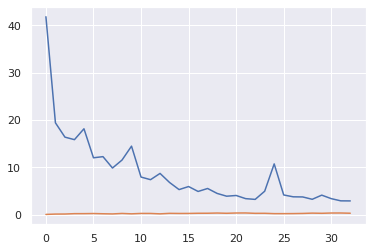

In [ ]:
NeuralClass(dx_train_dataset,y_train)